In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import defaultdict
from scipy.stats import chisquare

In [2]:
products = pd.read_table("products.tsv")
transactions = pd.read_table("transactions.tsv")
transaction_products = pd.read_table("transactionProducts.tsv")

In [3]:
products = products.rename(columns={'id': 'product_id'})
transactions = transactions.rename(columns={'id': 'transaction_id'})
book = transaction_products.merge(products, how='outer', on='product_id')
book = book.merge(transactions, how='outer', on='transaction_id')

In [4]:
book["category"] = book["category"].astype("category")
book["subcategory"] = book["subcategory"].astype("category")
book["animal_type"] = book["animal_type"].astype("category")
book["month"] = book["month"].astype("category")

# How many transactions per customer? 
Most customers have between 14 and 17 transactions for the year, with the most frequent number of purchases being 15.

[Text(0.5, 0, 'Number of Transactions'), Text(0, 0.5, 'Number of Customers')]

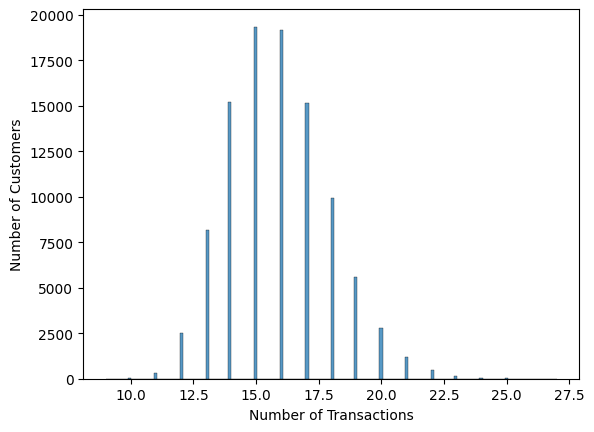

In [5]:
sns.histplot(transactions.drop(columns=['month']).groupby("customer_id").count(), x="transaction_id", kde=False).set(xlabel="Number of Transactions", ylabel="Number of Customers")

# Assuming most people need to buy food for their pets on a regular basis, do you think that customers are visiting as regularly as they could be?
   - Should the company invest in marketing or other strategies to increase the frequency of visits?
   
Most people are definitely buying food for their pets on a regular basis. Though, there does seem to be a number of customers that aren't adhearing to the monthly food visit. Closely analyzing the graph shows there is sort of a "wave pattern" going on where there will be a month with increased sales followed by a few months of food sales lower than the initial month before reaching a similar peak the next month after. Investing in marketing for those visits would be a waste considering the difference from the amount of sales (2322) is still just under one percent of the average number of sales.

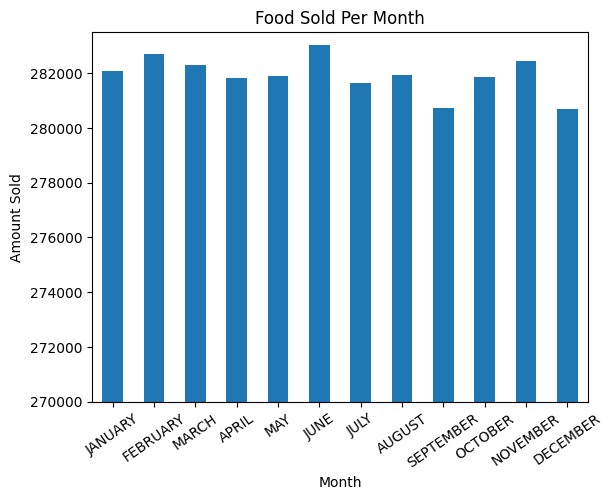

In [6]:
food=book[book["category"] == "FOOD"].groupby("month").count().reset_index().reindex([4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2])
food.plot.bar(x="month", y="transaction_id", legend=False).set(xlabel="Month", ylabel="Amount Sold"), plt.title("Food Sold Per Month"), plt.xticks(rotation=35)
plt.ylim(270000, 283500)
plt.show()

# How many items are sold for each animal type?  
- To which type of animals should the store invest the most space and marketing efforts on?

Dog and cat items.

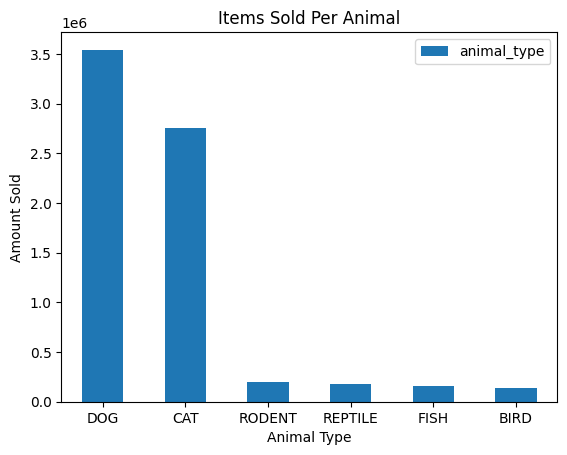

In [7]:
df = book["animal_type"].value_counts().reset_index()
df.plot.bar(x="index", y="animal_type").set(xlabel="Animal Type", ylabel="Amount Sold"), plt.title("Items Sold Per Animal"), plt.xticks(rotation=0)
plt.show()

# Are the number of transactions the same month-to-month or are their increases at certain times of year?  
- Does the company need to consider hiring temporary employees for part of the year or should they focus on their long-term employees that work year round? 

While it looks like there can be huge jumps from one month to another, an important thing to note is that the y axis Number of Transactions is bounded from 132000 to 132500. In fact only two months out of the year go over 400 sales and one of _those_ goes up to around 500. The rest of the 10 months span from about 132000 to 132350. If you wanted to hire temporary employees, they'd have to be working from March to June. In my opinion you should focus on the long term employees. 

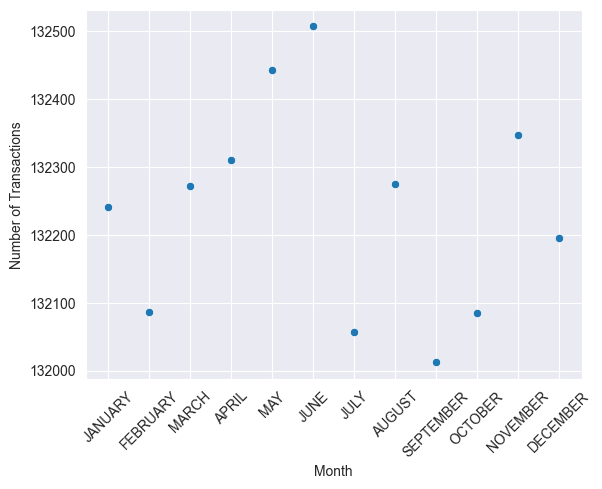

In [8]:
df = transactions["month"].value_counts().reset_index().reindex([6, 8, 5, 3, 1, 0, 10, 4, 11, 9, 2, 7])
df = df.rename(columns={"index": "Month", "month" :"Number of Transactions"})
sns.set_style("darkgrid")
sns.scatterplot(df, x="Month", y="Number of Transactions").tick_params(axis='x', rotation=45)

---
# Stores need to decide how to manage their inventories.  10 most popular products and 10 least popular products.

Text(0.5, 1.0, 'Least Popular Products')

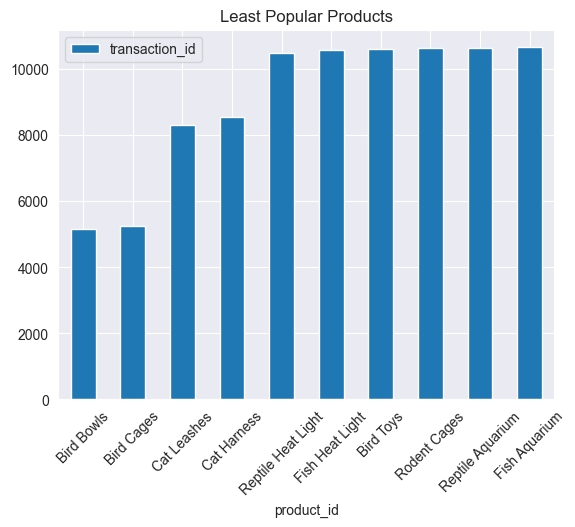

In [9]:
df = (transaction_products.groupby("product_id").count()).merge(products, how='outer', on='product_id').sort_values("transaction_id").head(10)
labels = ["Bird Bowls", "Bird Cages", "Cat Leashes", "Cat Harness", "Reptile Heat Light", "Fish Heat Light", "Bird Toys", "Rodent Cages", "Reptile Aquarium", "Fish Aquarium"]
df.plot.bar(x="product_id", y="transaction_id").set_xticklabels(labels, rotation = 45)
plt.title("Least Popular Products")

Text(0.5, 1.0, 'Most Popular Products')

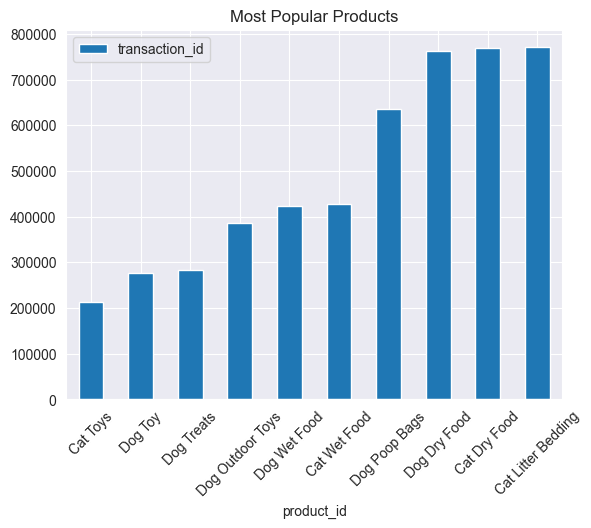

In [10]:
df = (transaction_products.groupby("product_id").count()).merge(products, how='outer', on='product_id').sort_values("transaction_id").tail(10)
labels = ["Cat Toys", "Dog Toy", "Dog Treats", "Dog Outdoor Toys", "Dog Wet Food", "Cat Wet Food", "Dog Poop Bags", "Dog Dry Food", "Cat Dry Food", "Cat Litter Bedding"]
df.plot.bar(x="product_id", y="transaction_id").set_xticklabels(labels, rotation = 45)
plt.title("Most Popular Products")

---
# If certain products are frequently purchased together, it can be useful to place these products physically adjacent to each other in the store or create incentives with discounts to increase sales of complementary products.  

There's a certain "pair" worth noting, a little more than just a pair really
- cat dry food, litter bedding, treats, wet food, collars, bed, leashes and indoor toys all have increased grouped transactions
This can be seen across multiple animal types where items associated with one animal are frequently bought together. Even items that have lower number of transactions overall still have great results being bought together like fish food, aquariums and decorations or reptile heat lights, aquariums and decorations. 

In [11]:
product_transactions = defaultdict(set)
for idx, row in transaction_products.iterrows():
    product_transactions[row.product_id].add(row.transaction_id)
#product1_id -> product2_id -> overlap
trans_percent = defaultdict(dict)
for product1, transactions1 in product_transactions.items():
    for product2, transactions2 in product_transactions.items():
        trans_percent[product1][product2] = 100. * len(transactions1.intersection(transactions2)) / len(transactions1)
df1 = pd.DataFrame.from_dict(trans_percent)

<AxesSubplot:>

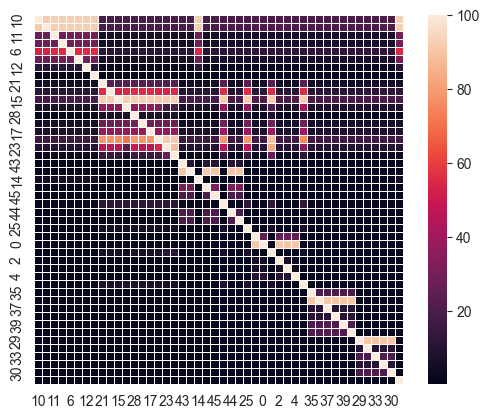

In [12]:
sns.heatmap(data=df1, square=True, linewidths=.5)

In [13]:
df1.head()

,10,5,11,7,6,13,12,8,21,16,...,37,36,39,38,29,32,33,31,30,9
10,100.000000,91.197681,91.776863,91.872300,91.540953,91.703199,91.965850,91.947927,19.974231,19.583536,...,19.953052,20.353053,20.066954,20.238876,20.164224,19.870289,20.135661,20.721659,20.590462,92.205968
5,91.153928,100.000000,91.794231,91.709436,91.542951,91.750238,92.009662,91.646577,19.982699,19.579265,...,20.037559,20.238550,20.081301,20.318501,20.217405,20.142871,20.078740,20.930012,20.585731,92.381510
11,27.656933,27.675444,100.000000,29.160263,28.643990,29.207806,29.511438,30.207329,6.291096,6.137160,...,6.657277,6.526718,6.456241,6.281030,6.364739,5.996804,6.209088,6.638886,6.746783,29.701580
7,27.637742,27.601991,29.109759,100.000000,28.523875,29.204411,29.308957,30.014465,6.280813,6.122587,...,6.253521,6.307252,6.408417,6.538642,6.270076,6.025002,6.617019,6.601004,6.363550,29.713283
6,53.293198,53.319942,55.337440,55.200994,100.000000,55.131127,55.617392,56.159595,11.968811,11.666809,...,12.441315,12.299618,11.860354,12.304450,12.207237,12.078203,12.228441,13.088361,12.623013,55.201872



---
# Are all of the products sold in equal amounts all year or are some products more popular during certain months?  

While most products are sold in equal amounts, there is one item that has an increased number of sales in the months of March, April, and May. This makes sense considering the product is dog rain coats. 

In [14]:
#Creating a dataframe that matches the product id with its p value
df = book.groupby(["product_id", "month"], as_index=False).size()
s1 = pd.DataFrame(products["product_id"])
s1["p_value"] = np.nan
end = 11
chiTest = df.loc[0:end, :]
for i in range(45):
    start = end+1
    end = end+12
    chiTest = df.loc[start:end, :]
    s1.at[i,"p_value"] =chisquare(chiTest["size"])[1]

In [15]:
#Sorting the list to display the top 10 value with the highest p values
s1.sort_values("p_value", ascending=False).head()

,product_id,p_value
28,28,0.999943
0,0,0.979914
34,34,0.970135
39,39,0.969829
14,14,0.966745


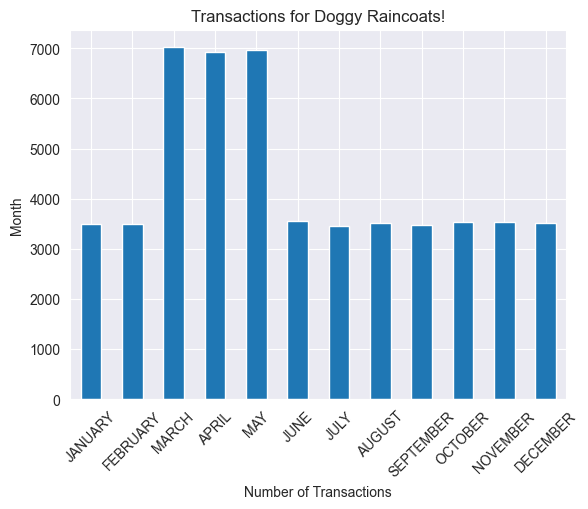

In [16]:
#Creating a bar plot to show the number of transactions by month
df=book[book["product_id"] == 28].groupby("month").count().reset_index().drop(columns=["product_id", "animal_type", "category", "subcategory", "customer_id"]).reindex([4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2])
df.plot.bar("month", legend = False), plt.ylabel("Month"), plt.xlabel("Number of Transactions"), plt.xticks(rotation=45), plt.title("Transactions for Doggy Raincoats!")
plt.show()